## ``Fazendo o processo de clusterização sem tratamento prévio:``

- Tratamento prévio é o Ajuste de Escala;

- A primeira versão do estudo foi feita sem pré-processamento, para comparar com versão posterior utilizando pipeline com pré-processamento, PCA e K-Means;

- Assim, a versão deste notebook não deve ser considerada para análises mais profundas, pois não terá uma segmentação ideal.

In [1]:
# Importando a biblioteca
import os

# Definindo a quantidade de THREADS a ser utilizada pelo KMeans
# Obs.1: suprimindo o aviso de falha de vazamento de memória do windows quando está utilizando o algoritmo KMeans 
# Obs.2: basicamente acontece quando o computador possui mais de um núcleo de processamento, dependendo da versão do Scikit-learn
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Importando a biblioteca
import pandas as pd

# Definindo uma contante com o caminha para carregar o arquivo csv
DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

# Carregando o arquivo csv e criando o DataFrame
df = pd.read_csv(DADOS)

# Exibindo as 5 primeiras linhas do DataFrame
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Plotando os Gráficos Elbow e Silhouette

- Determinando a quantidade de clusters

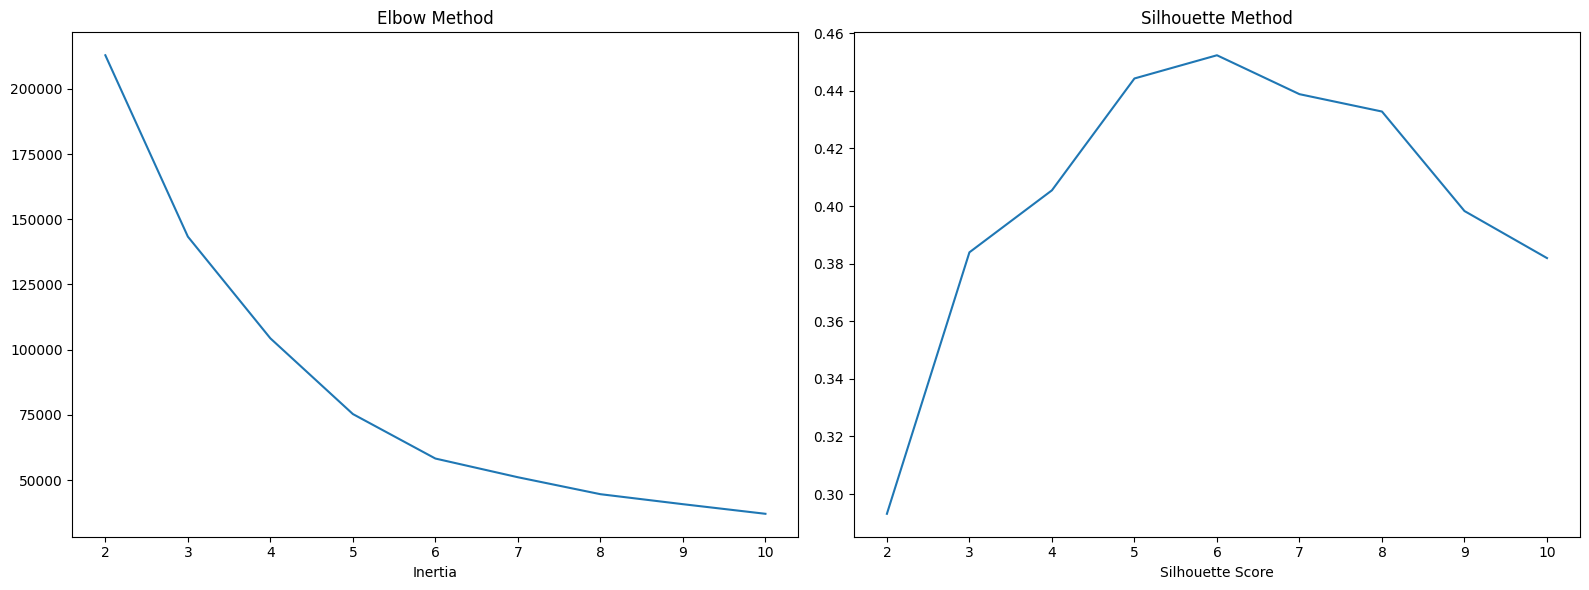

In [3]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Criando uma figura com 2 sistemas de eixos sendo 1 linha e 2 colunas 
# Obs.: usando tight_layout = True para os gráficos se ajustarem evitando a sobreposição
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6), tight_layout = True)

# Criando uma estrutura de dados, um dicionário vazio para o gráfico do cotovelo
elbow = {}

# Criando uma estrutura de dados, uma lista vazia para o gráfico da silhouette
silhouette = []

# Criando uma constante para possibilitar a repetição dos resultados do modelo
RANDOM_STATE = 42

# Criando uma variável com um range de 2 a 10 (11 exclusive)
# Obs.: fazendo um teste de 2 a 10 para definir qual é o melhor valor de k para criação dos clusters
k_range = range(2, 11)

# Definindo as colunas do gráfico a partir do DataFrame e atribuindo à variável X
# Obs.: excluindo a coluna categórica Gender, pois o algoritmo KMeans aceita somente variáveis numéricas
X = df.drop("Gender", axis = 1)

# Percorrendo a variável x em k_range
for i in k_range:
    # Aplicando o algoritmo e atribuindo à variável "kmeans"
    kmeans = KMeans(n_clusters = i, random_state = RANDOM_STATE, n_init = 10)
    # Fazendo o fit do Modelo
    kmeans.fit(X)
    # Passando para o gráfico elbow a chave "i" que indica o número de clusters e o kmeans.inertia_
    elbow[i] = kmeans.inertia_
    # Passando para o gráfico silhouette os rótulos(labels)
    labels = kmeans.labels_
    # Fazendo um append para o silhouette os parâmetros silhouette_score(X, labels)
    silhouette.append(silhouette_score(X, labels))

# Plotando o gráfico de linhas do seaborn elbow(cotovelo)
# Obs.1: passando no parâmetro x uma lista das chaves do dicionário
# Obs.2: passando no parâmetro y uma lista dos valores do dicionário
# Obs.3: passando no parâmetro ax a posição de índice 0 para o sistema de eixos
sns.lineplot(x = list(elbow.keys()), y = list(elbow.values()), ax = axs[0])
# Definindo o rótulo do Eixo X
axs[0].set_xlabel("K")
# Definindo o rótulo do Eixo Y
axs[0].set_xlabel("Inertia")
# Definindo o título para o gráfico
axs[0].set_title("Elbow Method")

# Plotando o gráfico de linhas do seaborn silhouette
# Obs.1: passando no parâmetro x uma lista do k_range
# Obs.2: passando no parâmetro y é o resultado da lista silhouette
# Obs.3: passando no parâmetro ax a posição de índice 1 para o sistema de eixos
sns.lineplot(x = list(k_range), y = silhouette, ax = axs[1])
# Definindo o rótulo do Eixo X
axs[1].set_xlabel("K")
# Definindo o rótulo do Eixo Y
axs[1].set_xlabel("Silhouette Score")
# Definindo o título para o gráfico
axs[1].set_title("Silhouette Method")

# Exibindo o gráfico
plt.show()

### Conclusão: 

- Tanto o gráfico do Cotovelo quanto o gráfico Silhouette mostram que o melhor valor para a quantidade de Clusters é igual a 6

## Fixando n_clusters = 6

In [4]:
# Aplicando o algoritmo e atribuindo à variável "kmeans" fixando n_clusters = 6
kmeans = KMeans(n_clusters = 6, random_state = RANDOM_STATE, n_init = 10)

# Fazendo o fit do modelo
kmeans.fit(X)

# Vusualizando o resultado 
# Obs.: os labels_ são os números dos clusters, sendo de 0 a 5
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### Observação:

- Os clusters apresentam um padrão, quando deveriam ser aleatórios, muito provavelmente devem receber uma grande influência da coluna da Renda Anual que deve ter sido ordenada.

## Salvando o Modelo

In [5]:
# Importando a biblioteca
import joblib

# Salvando o Modelo na pasta modelos
joblib.dump(kmeans, "../modelos/kmeans.pkl")

['../modelos/kmeans.pkl']

## Criando um Novo DataFrame 

- Após a clusterização a partir do DataFrame de origem

In [6]:
# Criando um novo DataFrame
df_clustered = df.copy()

# Incluindo uma coluna no DataFrame contendo os labels 
# Obs.: esses labels são so números dos clusters
df_clustered["cluster"] = kmeans.labels_

# Exibindo as 5 primeiras linhas do DataFrame
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


## Salvando em um Novo Arquivo CSV

- Gravando o arquivo csv clusterizado na pasta dados 

In [7]:
df_clustered.to_csv("../dados/Mall_Customers_no_CustomerID_clustered.csv", index = False)

## Criando um Pairplot Kde para o DataFrame Clusterizado

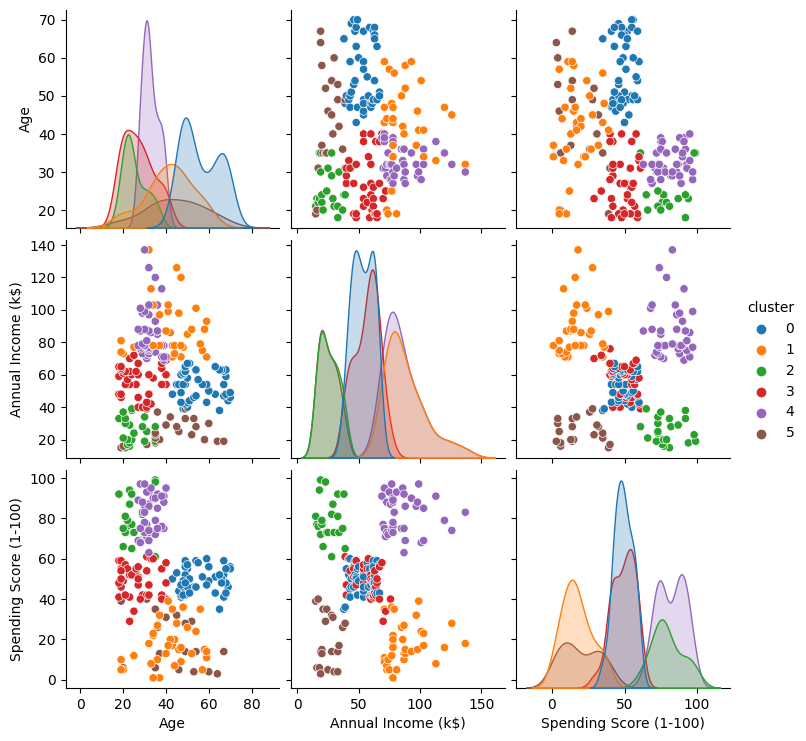

In [8]:
# Criando um pairplot kde
# Obs.1: passando como parâmetros o DataFrame, o tipo kde e o hue 
# Obs.2: passando o parâmetro palette = "tab10" do matplotlib/seaborn para melhorar a exibição das cores do degrade padrão
sns.pairplot(df_clustered, diag_kind = "kde", hue = "cluster", palette = "tab10");

## Criando um BoxPlot para os Clustsers de cada uma das Colunas Numéricas

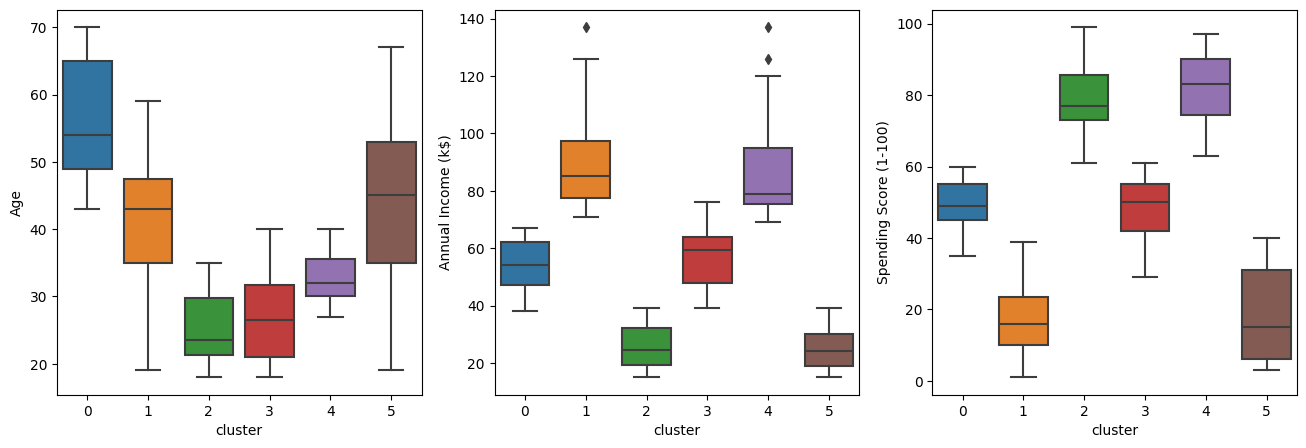

In [9]:
# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))

# Percorrendo cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x os clusters, eixo y as colunas e ax o sistema de eixos
    sns.boxplot(data = df_clustered, x = "cluster", y = col, ax = ax)

# Exibindo o gráfico    
plt.show() 

### O gráfico Pairplot e o gráfico Boxplot são complementares para ajudar na análise dos dados

## Criando um perfil para cada Cluster com base no gráfico BoxPlot

- Cluster 0 - Pontuação de gastos moderada, renda moderada, idade alta 
- Cluster 1 - Pontuação de gastos baixa, renda alta, idade moderada 
- Cluster 2 - Pontuação de gastos alta, renda baixa, idade jovem 
- Cluster 3 - Pontuação de gastos moderada, renda moderada, idade jovem 
- Cluster 4 - Pontuação de gastos alta, renda alta, idade jovem 
- Cluster 5 - Pontuação de gastos baixa, renda baixa, idade moderada 


Transformando os pontos acima em uma tabela:

Pontuação de gastos | Renda | Idade | Número Cluster
--- | --- | --- | ---
Moderada | Moderada | Alta | 0
Baixa | Alta | Moderada | 1
Alta | Baixa | Jovem | 2
Moderada | Moderada | Jovem | 3
Alta | Alta | Jovem | 4
Baixa | Baixa | Moderada | 5

## Verificando se cada Cluster tem uma quantidade de clientes significativa

In [10]:
# Verificando a quantidade de clientes em cada cluster
# Obs.1: usando o .value_counts() para fazer a contagem 
# Obs.2: usando o .sort_index() para classificar 
df_clustered["cluster"].value_counts().sort_index()

0    45
1    35
2    22
3    38
4    39
5    21
Name: cluster, dtype: int64

In [11]:
# Verificando a quantidade de clientes em cada cluster
# Obs.1: usando o .value_counts() para fazer a contagem 
# Obs.2: usando o parâmetro normalize = True para obter o resultado em porcentagem
# Obs.3: usando o parâmetro .mul(100) para multiplicar por 100
# Obs.4: usando o .sort_index() para classificar 
df_clustered["cluster"].value_counts(normalize = True).mul(100).sort_index()

0    22.5
1    17.5
2    11.0
3    19.0
4    19.5
5    10.5
Name: cluster, dtype: float64

## Analisando os Clusters por Generos

### Quantidade de clientes de cada genero por cluster:

In [12]:
# Fazendo o agrupamento da quantidade de clientes por cluster e por genero
# Obs.: usando o parâmetros .size() para obter a quantidade
df_clustered.groupby(by = ["cluster", "Gender"]).size()

cluster  Gender
0        Female    25
         Male      20
1        Female    15
         Male      20
2        Female    13
         Male       9
3        Female    25
         Male      13
4        Female    21
         Male      18
5        Female    13
         Male       8
dtype: int64

## Visualizando no BoxPlot os Clusters por Generos

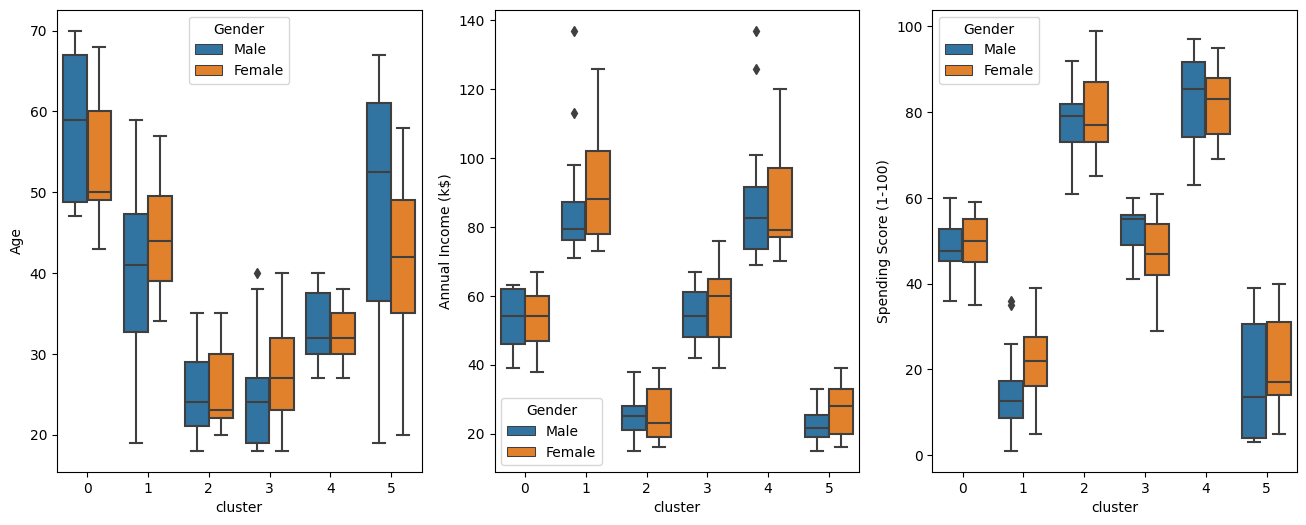

In [13]:
# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

# Percorrendo cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x os clusters, eixo y as colunas, o ax o sistema de eixos e o hue para o Gender
    sns.boxplot(data = df_clustered, x = "cluster", y = col, ax = ax, hue = "Gender")

# Exibindo o gráfico    
plt.show()